In [36]:
import pandas as pd
import numpy as np

In [37]:
import sys
sys.path.insert(0, '../scripts/')

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 196

In [40]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
%aimport shapeslib

In [42]:
shapes_file = '../wip/smoothshape/ddf--datapoints--population_percentage--by--country--year--coverage_type--bracket.csv'
known_shapes = pd.read_csv(shapes_file)

In [43]:
# create a sorted version
shapes = known_shapes.set_index(['country', 'year']).sort_index()

In [1]:
income_file = '../../../ddf--gapminder--fasttrack/ddf--datapoints--mincpcap_cppp--by--country--time.csv'
gini_file =  '../../../ddf--gapminder--fasttrack/ddf--datapoints--gini--by--country--time.csv'

In [2]:
delta = 0.01

In [3]:
def bracket_number_from_income(s):
    """input a daily income, output a bracket number"""
    # delta = 0.10050251256281406
    return ((np.log2(s) + 7) / delta).astype(int)

In [47]:
income = pd.read_csv(income_file).set_index(['country', 'time'])
gini = pd.read_csv(gini_file).set_index(['geo', 'time'])

income.index.names = ['country', 'year']
gini.index.names = ['country', 'year']

income.columns = ['income']
gini.columns = ['gini']

In [48]:
income_gini = pd.concat([income, gini], axis=1)

In [49]:
income_gini

income  gini
country year              
afg     1800  0.9194  30.5
        1801  0.9194  30.5
        1802  0.9194  30.5
        1803  0.9194  30.5
        1804  0.9194  30.5
...              ...   ...
zwe     2046  5.5473   NaN
        2047  5.6645   NaN
        2048  5.7845   NaN
        2049  5.9075   NaN
        2050  6.0332   NaN

[49427 rows x 2 columns]

In [50]:
income_gini = income_gini.dropna(how='any').sort_index()

In [51]:
s1 = shapeslib.get_estimated_mountain(('ago', 1980), shapes, income_gini)

In [52]:
s0 = shapeslib.get_shape(('ago', 1981), shapes)
i = income_gini.loc[('ago', 1981), 'income']

In [53]:
s0.index = s0.index + shapeslib.bracket_number_from_income(i)

In [54]:
s0

bracket
0      7.153827e-06
1      8.619550e-06
2      1.029801e-05
3      1.214019e-05
4      1.423205e-05
           ...     
195    3.783160e-07
196    3.281227e-07
197    2.830011e-07
198    2.423785e-07
199    2.060453e-07
Name: population_percentage, Length: 200, dtype: float64

In [55]:
s1

0      0.000000e+00
1      7.118058e-06
2      8.576452e-06
3      1.024652e-05
4      1.207949e-05
           ...     
195    4.369047e-07
196    3.806093e-07
197    3.301239e-07
198    2.847497e-07
199    2.439100e-07
Length: 200, dtype: float64

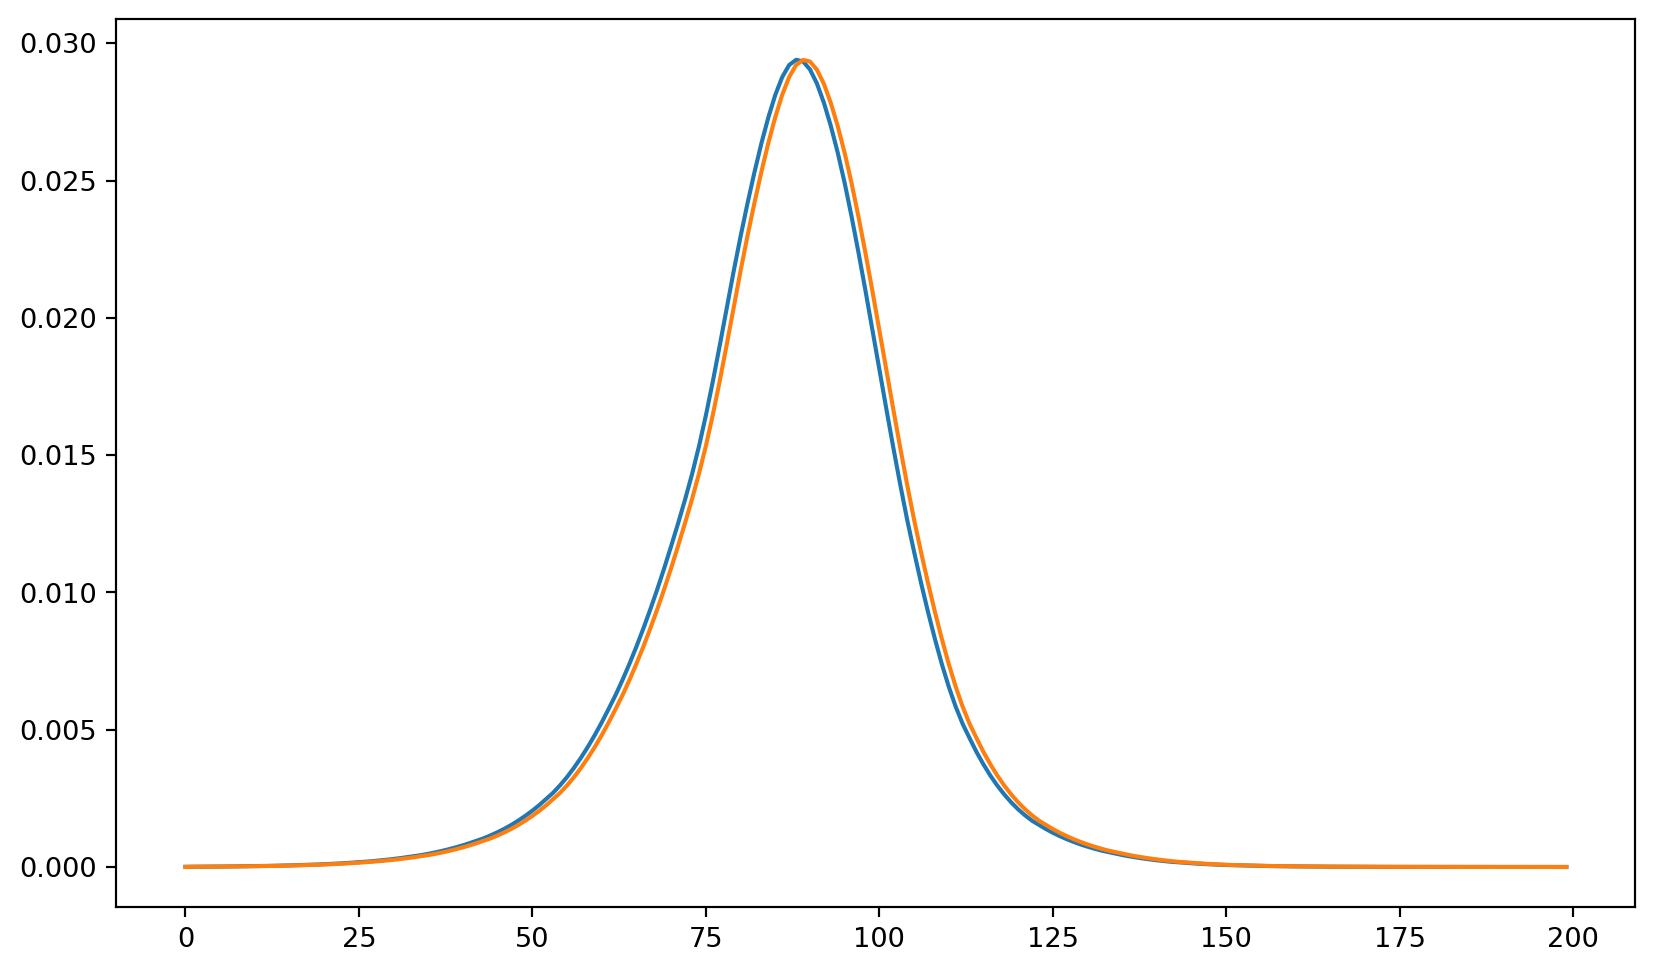

In [56]:
plt.plot(s0)
plt.plot(s1)

In [57]:
shapes

coverage_type  bracket  population_percentage
country year                                              
ago     1981             n      -94           7.153827e-06
        1981             n      -93           8.619550e-06
        1981             n      -92           1.029801e-05
        1981             n      -91           1.214019e-05
        1981             n      -90           1.423205e-05
...                    ...      ...                    ...
zwe     2019             n      105           1.402410e-07
        2019             n      106           1.090947e-07
        2019             n      107           8.406808e-08
        2019             n      108           6.417809e-08
        2019             n      109           4.857008e-08

[1323800 rows x 3 columns]

In [58]:
shapes_noc = shapes.copy()

In [59]:
shapes_noc = shapes_noc.set_index(['bracket'], append=True)

In [60]:
shapes_noc

coverage_type  population_percentage
country year bracket                                     
ago     1981 -94                 n           7.153827e-06
             -93                 n           8.619550e-06
             -92                 n           1.029801e-05
             -91                 n           1.214019e-05
             -90                 n           1.423205e-05
...                            ...                    ...
zwe     2019  105                n           1.402410e-07
              106                n           1.090947e-07
              107                n           8.406808e-08
              108                n           6.417809e-08
              109                n           4.857008e-08

[1323800 rows x 2 columns]

In [61]:
def applyfunc(ser):
    for c in 'naur':
        if c in ser['coverage_type'].values:
            return ser[ser['coverage_type'] == c]['population_percentage']

In [62]:
shapes_noc2 = shapes_noc.groupby(['country', 'year'], as_index=False).apply(applyfunc)

In [63]:
shapes_noc2 = shapes_noc2.reset_index(level=0, drop=True).sort_index()

In [64]:
shapes_noc2

country  year  bracket
ago      1981  -94        7.153827e-06
               -93        8.619550e-06
               -92        1.029801e-05
               -91        1.214019e-05
               -90        1.423205e-05
                              ...     
zwe      2019   105       1.402410e-07
                106       1.090947e-07
                107       8.406808e-08
                108       6.417809e-08
                109       4.857008e-08
Name: population_percentage, Length: 1277800, dtype: float64

In [36]:
# shapes_noc2 = shapes_noc2.reset_index('bracket')

In [65]:
i = ('ago', 1980)
income, gini = shapeslib.get_income_gini(i, income_gini)
_, nei = shapeslib.get_neighbors(income, gini, 50) 

In [66]:
%%timeit
nei_shapes = [shapes_noc2.loc[x] for x in nei]
shapeslib.merge_nshapes(nei_shapes)

146 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
shapes_noc3 = shapes_noc2.reset_index()

In [68]:
shapes_noc3 = shapes_noc3.set_index(['country', 'year'])

In [69]:
%%timeit
shapes_noc3.loc[nei].set_index('bracket').groupby('bracket').sum()['population_percentage'] / len(nei)

48.8 ms ± 702 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
%%timeit
s3 = shapeslib.get_average_shape(i, shapes, income_gini)

199 ms ± 3.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [71]:
shapes_noc4 = shapes_noc2.reset_index()

In [72]:
shapes_noc4['country-year'] = list(zip(shapes_noc4['country'].values, shapes_noc4['year'].values))

In [73]:
shapes_noc4 = shapes_noc4.set_index(['country-year', 'bracket'])['population_percentage']

In [74]:
idx = pd.IndexSlice

In [75]:
%%timeit
shapes_noc4.loc[shapes_noc4.index.get_level_values(0).isin(nei)].groupby('bracket').sum() / 50

54 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [198]:
shapes_noc4.loc[('ago', 1981)]

bracket
-94     7.153827e-06
-93     8.619550e-06
-92     1.029801e-05
-91     1.214019e-05
-90     1.423205e-05
            ...     
 101    3.783160e-07
 102    3.281227e-07
 103    2.830011e-07
 104    2.423785e-07
 105    2.060453e-07
Name: population_percentage, Length: 200, dtype: float64

In [56]:
%%timeit
i = ('ago', 1980)
shapeslib.get_estimated_mountain(i, shapes, income_gini, resample=False) 

250 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
len(income_gini.index)

46513

In [66]:
46513 * 90 / 1000 / 60 / 11

6.342681818181819

In [84]:
all_years = set(range(1800, 2041))
all_weights = dict([(x, shapeslib.get_weights(x)) for x in all_years])

In [88]:
all_weights[1939]

(0.6799999999999999, 0.32)

In [ ]:
# pre-compute the neighbour list

In [76]:
income_gini_noc = income_gini.reset_index(drop=True).drop_duplicates()

In [77]:
income_gini_noc

,income,gini
0,0.9194,30.5
10,0.9207,30.5
21,0.9262,30.5
22,0.9289,30.5
23,0.9316,30.5
...,...,...
46508,4.4967,43.2
46509,4.5910,43.2
46510,4.6882,43.2
46511,4.7883,43.2


In [79]:
from multiprocessing import Pool

In [80]:
def get_distances_res(v):
    i = v[0]
    g = v[1]
    cno, neis = shapeslib.get_neighbors(i, g)
    return (i, g), (cno, neis)

with Pool(6) as p:
    res_distances = p.map(get_distances_res, income_gini_noc.values)

Process ForkPoolWorker-6:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-5:


KeyboardInterrupt: 

In [103]:
res_distances_dict = dict(res_distances)

In [105]:
i, g = shapeslib.get_income_gini(('ago', 1800), income_gini)
res_distances_dict[(i, g)]

(6,
 [('hti', 1994),
  ('caf', 1995),
  ('hti', 1995),
  ('hti', 1993),
  ('hti', 1992),
  ('hti', 1996),
  ('caf', 2014),
  ('caf', 2013),
  ('caf', 1996),
  ('caf', 2015),
  ('caf', 2016),
  ('swz', 1996),
  ('caf', 2017),
  ('caf', 2018),
  ('caf', 2019),
  ('hti', 1991),
  ('swz', 1997),
  ('hti', 1997),
  ('hti', 1989),
  ('hti', 1988),
  ('hti', 2004),
  ('hti', 1990),
  ('zmb', 2015),
  ('zmb', 2016),
  ('zmb', 2014),
  ('zmb', 2019),
  ('zmb', 2017),
  ('hti', 2003),
  ('zmb', 2018),
  ('zmb', 2013),
  ('hti', 1998),
  ('caf', 2010),
  ('swz', 1995),
  ('hti', 2005),
  ('zmb', 2012),
  ('zmb', 1992),
  ('zmb', 2011),
  ('caf', 2011),
  ('zmb', 1991),
  ('caf', 1994),
  ('hti', 2002),
  ('lso', 1999),
  ('caf', 2012),
  ('zmb', 2010),
  ('caf', 2009),
  ('hti', 1999),
  ('mwi', 1987),
  ('lso', 2000),
  ('hti', 2001),
  ('mwi', 1988)])

In [110]:
income_gini.index.values

array([('afg', 1800), ('afg', 1801), ('afg', 1802), ..., ('zwe', 2038),
       ('zwe', 2039), ('zwe', 2040)], dtype=object)

In [114]:
all_neighbours = []
for cy in income_gini.index.values:
    i, g = shapeslib.get_income_gini(cy, income_gini)
    all_neighbours.append((cy, res_distances_dict[(i, g)]))

In [115]:
all_neighbours = dict(all_neighbours)

In [116]:
all_neighbours[('afg', 1800)]

(11,
 [('npl', 1983),
  ('npl', 1981),
  ('npl', 1982),
  ('npl', 1984),
  ('npl', 1985),
  ('tza', 1985),
  ('npl', 1986),
  ('tza', 1984),
  ('npl', 1987),
  ('pak', 1981),
  ('chn', 1989),
  ('pak', 1982),
  ('npl', 1988),
  ('tza', 1986),
  ('rwa', 1986),
  ('pak', 1983),
  ('rwa', 1987),
  ('tza', 1983),
  ('eth', 2003),
  ('chn', 1988),
  ('npl', 1989),
  ('rwa', 1985),
  ('tjk', 1999),
  ('eth', 2001),
  ('eth', 2002),
  ('idn', 1998),
  ('chn', 1990),
  ('idn', 1988),
  ('pak', 1984),
  ('rwa', 1984),
  ('idn', 1987),
  ('idn', 1986),
  ('idn', 1989),
  ('eth', 2004),
  ('ind', 1982),
  ('ind', 1981),
  ('npl', 1990),
  ('ind', 1983),
  ('chn', 1987),
  ('idn', 1985),
  ('rwa', 1981),
  ('tls', 2006),
  ('ind', 1984),
  ('pak', 1994),
  ('eth', 2000),
  ('rwa', 1982),
  ('eth', 2005),
  ('bih', 1993),
  ('eth', 2006),
  ('tza', 1987)])

In [81]:
import json

In [125]:
all_neighbours_json = dict()

for k, v in all_neighbours.items():
    c, y = k
    if c not in all_neighbours_json.keys():
        all_neighbours_json[c] = dict()
    all_neighbours_json[c][y] = {
        "countries": v[0],
        "neighbours": [list(x) for x in v[1]]
    }

In [126]:
all_neighbours_json['afg'][1900]

{'countries': 8,
 'neighbours': [['bdi', 1997],
  ['rwa', 1994],
  ['bdi', 2001],
  ['ner', 1994],
  ['ner', 1995],
  ['bdi', 1996],
  ['tcd', 2000],
  ['bdi', 2002],
  ['bdi', 2019],
  ['sle', 2001],
  ['bdi', 2018],
  ['tcd', 1996],
  ['bdi', 2017],
  ['tcd', 1999],
  ['sle', 2004],
  ['tcd', 1997],
  ['ner', 2007],
  ['bdi', 1998],
  ['mmr', 1988],
  ['sle', 2005],
  ['mmr', 1991],
  ['mmr', 1989],
  ['bdi', 2016],
  ['mmr', 1990],
  ['tza', 2004],
  ['mmr', 1992],
  ['tcd', 1995],
  ['tcd', 1993],
  ['mmr', 1981],
  ['mmr', 1987],
  ['mmr', 1993],
  ['tcd', 1998],
  ['mmr', 1982],
  ['tza', 2005],
  ['mmr', 1983],
  ['mmr', 1986],
  ['mmr', 1994],
  ['mmr', 1984],
  ['mmr', 1985],
  ['tcd', 2001],
  ['sle', 2003],
  ['mmr', 1995],
  ['bdi', 2000],
  ['sle', 2000],
  ['tcd', 1994],
  ['sle', 2002],
  ['mmr', 1996],
  ['bdi', 2015],
  ['sle', 1999],
  ['gmb', 1987]]}

In [128]:
fp = open('../wip/neighbours_list.json', 'w')
json.dump(all_neighbours_json, fp, indent=2)

In [130]:
nei = all_neighbours_json['ago'][1981]['neighbours']
nei = [tuple(x) for x in nei]
shapes_noc4.loc[shapes_noc4.index.get_level_values(0).isin(nei)].groupby('bracket').sum() / 50

bracket
-88     1.887834e-07
-87     2.271020e-06
-86     4.517832e-06
-85     5.634300e-06
-84     8.477594e-06
            ...     
 120    5.336373e-10
 121    4.335379e-10
 122    3.504213e-10
 123    2.814454e-10
 124    2.242767e-10
Name: population_percentage, Length: 213, dtype: float64

In [131]:
def get_average_shape(c, y, shapes, neighbours):
    nei = neighbours[c][y]['neighbours']
    nei = [tuple(x) for x in nei]
    return shapes.loc[shapes.index.get_level_values(0).isin(nei)].groupby('bracket').sum() / 50

In [141]:
def get_nearest_known_shape(country, year, known_shapes):
    try:
        df = known_shapes.loc[country]
    except KeyError:
        return None
    
    if year > 2018:
        nearest = df.index.get_level_values(0)[-1]
    else:
        nearest = df.index.get_level_values(0)[0]
    return df.loc[nearest]

In [149]:
def get_estimated_mountain2(idx, income, known_shapes, known_shapes_2, neighbours, n=50, resample=False):
    country, year = idx
    first_known_shape = get_nearest_known_shape(country, year, known_shapes)
    if first_known_shape is None:
        return None
    average_shape = get_average_shape(c, y, known_shapes_2, neighbours)
    weights = all_weights[year]
    mixed_shape = shapeslib.merge_nshapes_with_weights([first_known_shape, average_shape], weights)
    bracket = bracket_number_from_income(income)
    mixed_shape.index = mixed_shape.index + bracket
    # if mixed_shape.index[-1] != 200:
    #     new_idx = pd.Index.from_
    #     mixed_shape = mixed_shape.reindex(new_idx)
    # return mixed_shape.loc[0:200]
    res = mixed_shape.loc[0:199]
    if len(res) != 200:
        # print(f'not enough points in mixed shape: {idx}')
        new_idx = pd.Index(range(200))
        res = mixed_shape.reindex(new_idx, fill_value=0)
    if resample:
        return res[::4]
    else:
        return res


In [143]:
get_nearest_known_shape('ago', 1921, shapes_noc4)

In [151]:
%%timeit
i, g = shapeslib.get_income_gini(('ago', 1980), income_gini)
get_estimated_mountain2(('ago', 1980), i, shapes_noc2, shapes_noc4, all_neighbours_json)

93.3 ms ± 607 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [153]:
from functools import partial

In [154]:
skip_list = list()
for i in income_gini.index.values:
    country, year = i
    if country in skip_list:
        continue
    try:
        shapes.loc[country]
    except KeyError:
        skip_list.append(country)
        print(f'skip {country}')

skip afg
skip and
skip atg
skip bhr
skip bhs
skip brb
skip brn
skip cub
skip dma
skip eri
skip gnq
skip grd
skip khm
skip kna
skip kwt
skip lby
skip mco
skip mhl
skip nzl
skip omn
skip plw
skip prk
skip qat
skip sau
skip sgp
skip smr
skip vct


In [157]:
shape_known_list = shapes.index.values.tolist()

In [158]:
def process(i, skip_list, shape_known_list):
    country, year = i
    if country in skip_list:
        return None
    if i not in shape_known_list:
        income, _ = shapeslib.get_income_gini(i, income_gini)
        res = get_estimated_mountain2(i, income, shapes_noc2, shapes_noc4, all_neighbours_json)
        # res = shapeslib.get_estimated_mountain(i, shapes, income_gini, resample=False) 
        return i, res

In [159]:
run = partial(process, skip_list=skip_list, shape_known_list=shape_known_list)

In [160]:
# begins at 11:59

In [161]:
with Pool(11) as p:
    res = p.map(run, income_gini.index.values)

In [162]:
!date

Wed Oct  6 12:11:06 CST 2021


In [163]:
res = [x for x in res if x is not None]

In [164]:
res[0]

(('ago', 1800),
 bracket
 0      0.000002
 1      0.000003
 2      0.000004
 3      0.000005
 4      0.000082
          ...   
 195    0.000074
 196    0.000074
 197    0.000074
 198    0.000074
 199    0.000074
 Length: 200, dtype: float64)

In [165]:
len(res)

33656

In [49]:
df = res[0][1]
df.name = 'income_mountain'
df = df.reset_index()
df['country'] = 'ago'
df['year'] = 1900
df = df.set_index(['country', 'year', 'bracket'])

In [50]:
df

income_mountain
country year bracket                 
ago     1900 0               0.000057
             1               0.000069
             2               0.000092
             3               0.000108
             4               0.000132
...                               ...
             195             0.000000
             196             0.000000
             197             0.000000
             198             0.000000
             199             0.000000

[200 rows x 1 columns]

In [166]:
res2 = []
for k, v in res:
    df = v.copy()
    country, year = k
    # print(country, year)
    df.index.name = 'bracket'
    df.name = 'income_mountain'
    df = df.reset_index()
    df['country'] = country
    df['year'] = year
    df = df.set_index(['country', 'year', 'bracket'])
    res2.append(df)

In [167]:
res3 = pd.concat(res2)

In [168]:
res3

income_mountain
country year bracket                 
ago     1800 0               0.000002
             1               0.000003
             2               0.000004
             3               0.000005
             4               0.000082
...                               ...
zwe     2040 195             0.000008
             196             0.000008
             197             0.000008
             198             0.000008
             199             0.000008

[6731200 rows x 1 columns]

In [63]:
shapes

coverage_type  bracket  population_percentage
country year                                              
ago     1981             n      -94               0.000007
        1981             n      -93               0.000009
        1981             n      -92               0.000010
        1981             n      -91               0.000012
        1981             n      -90               0.000014
...                    ...      ...                    ...
zwe     2019             n      105               0.000000
        2019             n      106               0.000000
        2019             n      107               0.000000
        2019             n      108               0.000000
        2019             n      109               0.000000

[1323800 rows x 3 columns]

In [169]:
res4 = []
for c in shapes.index.get_level_values('country').unique():
    df = shapes.loc[[c]]
    for ct in 'naur':
        if ct in df['coverage_type'].values:
            df_ = df[df['coverage_type'] == ct].copy()
            df_ = df_.drop(columns='coverage_type')
            res4.append((c, df_))
            break

In [170]:
res4[0]

('ago',
               bracket  population_percentage
 country year                                
 ago     1981      -94           7.153827e-06
         1981      -93           8.619550e-06
         1981      -92           1.029801e-05
         1981      -91           1.214019e-05
         1981      -90           1.423205e-05
 ...               ...                    ...
         2019      110           8.389824e-07
         2019      111           7.317892e-07
         2019      112           6.345291e-07
         2019      113           5.463651e-07
         2019      114           4.665248e-07
 
 [7800 rows x 2 columns])

In [175]:
res5 = []
for c, df in res4:
    for y in range(1981, 2020):
        idx = (c, y)
        try:
            df2 = df.set_index(['bracket'], append=True).loc[idx]
            # print(df2)
        except KeyError:
            print(idx)
            continue
        if not df2.empty:
            m = shape_to_mountain(df2, idx, income_gini)
            if m is not None:
                res5.append(m)

('fsm', 1981)
('fsm', 1982)
('fsm', 1983)
('fsm', 1984)
('fsm', 1985)
('ind', 2018)
('ind', 2019)
('ind', 2018)
('ind', 2019)
('ind', 2018)
('ind', 2019)
('nru', 1981)
('nru', 1982)
('nru', 1983)
('nru', 1984)
('nru', 1985)
('nru', 1986)
('nru', 1987)
('nru', 1988)
('nru', 1989)
('nru', 1990)
('nru', 1991)
('nru', 1992)
('nru', 1993)
('nru', 1994)
('nru', 1995)
('nru', 1996)
('nru', 1997)
('nru', 1998)
('nru', 1999)
('nru', 2000)
('nru', 2001)
('nru', 2002)
('nru', 2003)
('som', 1981)
('som', 1982)
('som', 1983)
('som', 1984)
('som', 1985)
('som', 1986)
('som', 1987)
('som', 1988)
('som', 1989)
('som', 1990)
('som', 1991)
('som', 1992)
('som', 1993)
('som', 1994)
('som', 1995)
('som', 1996)
('som', 1997)
('som', 1998)
('som', 1999)
('som', 2000)
('som', 2001)
('som', 2002)
('som', 2003)
('som', 2004)
('som', 2005)
('som', 2006)
('som', 2007)
('som', 2008)
('som', 2009)
('som', 2010)
('ssd', 1981)
('ssd', 1982)
('ssd', 1983)
('ssd', 1984)
('ssd', 1985)
('ssd', 1986)
('ssd', 1987)
('ssd'

In [176]:
res6 = pd.concat(res5)

In [177]:
res6.columns = ['income_mountain']

In [178]:
res7 = pd.concat([res3, res6])

In [179]:
res7

income_mountain
country year bracket                 
ago     1800 0           2.246166e-06
             1           2.828635e-06
             2           4.246889e-06
             3           4.955077e-06
             4           8.199470e-05
...                               ...
zwe     2019 195         1.090947e-07
             196         8.406808e-08
             197         6.417809e-08
             198         4.857008e-08
             199         0.000000e+00

[8047200 rows x 1 columns]

In [180]:
res7.to_csv('../wip/income_mountain_200brackets.csv')

In [153]:
from ddf_utils.str import format_float_digits
formattor = partial(format_float_digits, digits=6)

In [12]:
res7 = pd.read_csv('../wip/income_mountain_200brackets.csv')

In [13]:
res7 = res7.sort_values(by=['country', 'year', 'bracket'])

In [14]:
res7

,country,year,bracket,income_mountain
0,ago,1800,0,0.000002
1,ago,1800,1,0.000003
2,ago,1800,2,0.000004
3,ago,1800,3,0.000005
4,ago,1800,4,0.000082
...,...,...,...,...
6731195,zwe,2040,195,0.000008
6731196,zwe,2040,196,0.000008
6731197,zwe,2040,197,0.000008
6731198,zwe,2040,198,0.000008


In [15]:
np.all(res7['income_mountain'] >= 0)

True

In [16]:
res8 = res7.iloc[::4]

In [17]:
res8 = res8.set_index(['country', 'year', 'bracket']).sort_index()

In [18]:
res7 = res7.set_index(['country', 'year', 'bracket']).sort_index()

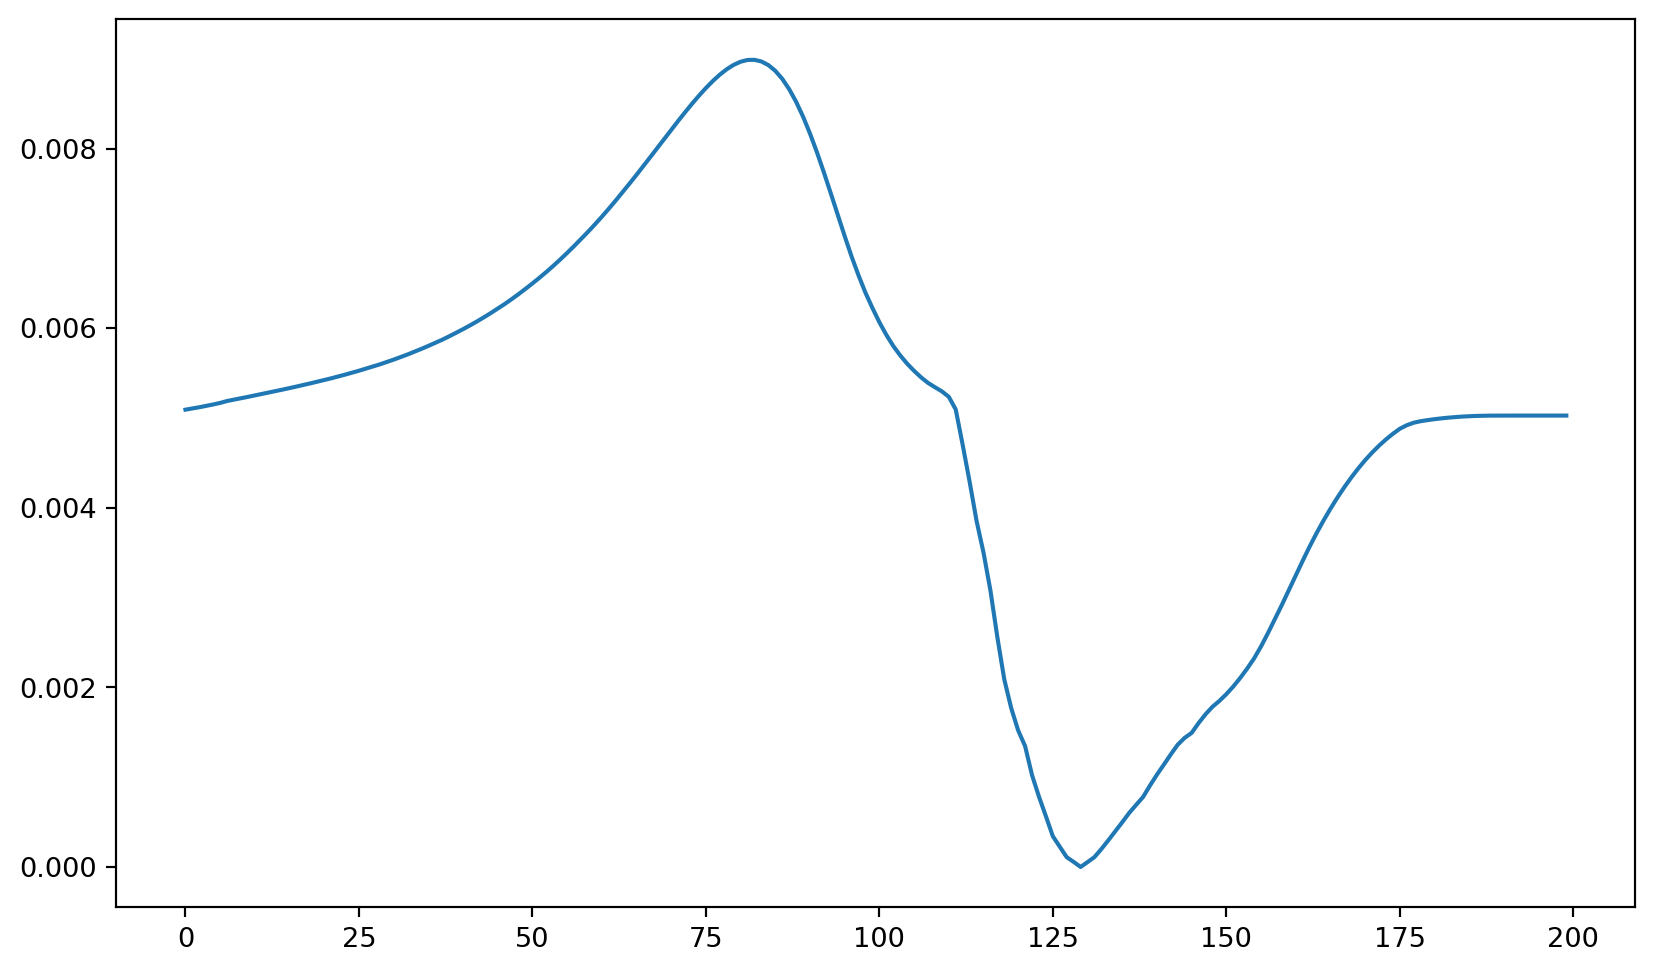

In [19]:
plt.plot(res7.loc[('sle', 1984)])

In [20]:
res8

income_mountain
country year bracket                 
ago     1800 0               0.000002
             4               0.000082
             8               0.000088
             12              0.000095
             16              0.000105
...                               ...
zwe     2040 180             0.000008
             184             0.000008
             188             0.000009
             192             0.000009
             196             0.000008

[2011800 rows x 1 columns]

In [21]:
# next, covert headcount to population 

In [21]:
pop_file = '../../../ddf--gapminder--systema_globalis/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv'

In [22]:
pop = pd.read_csv(pop_file).set_index(['geo', 'time'])['population_total']

In [23]:
pop

geo  time
afg  1800     3280000
     1801     3280000
     1802     3280000
     1803     3280000
     1804     3280000
               ...   
zwe  2096    30940779
     2097    30952208
     2098    30959811
     2099    30964052
     2100    30965421
Name: population_total, Length: 59297, dtype: int64

In [24]:
res9 = []
gs = res8.groupby(['country', 'year'])
for g, df in gs:
    p = pop.loc[g]
    res9.append(df['income_mountain'] * p)

In [25]:
res10 = pd.concat(res9)

In [26]:
res10

country  year  bracket
ago      1800  0            3.519805
               4          128.487986
               8          137.654032
               12         149.343571
               16         164.314554
                             ...    
zwe      2040  180        176.616288
               184        176.947842
               188        183.252512
               192        177.948894
               196        173.079058
Name: income_mountain, Length: 2011800, dtype: float64

In [27]:
# res10[res10 == res10.min()]
res10.loc[('sle', 1984)]

bracket
0      18885.550879
4      19100.459072
8      19356.102581
12     19594.652663
16     19840.289487
20     20108.040617
24     20411.346986
28     20755.443273
32     21164.230837
36     21646.657573
40     22208.927705
44     22874.692822
48     23656.925365
52     24570.666072
56     25639.396952
60     26851.374595
64     28223.609675
68     29694.125040
72     31167.848533
76     32458.236895
80     33254.772481
84     33115.499392
88     31601.301856
92     28686.894725
96     25206.298521
100    22496.656802
104    20785.920121
108    19814.771940
112    17438.684869
116    11426.281569
120     5640.029731
124     2093.805136
128      210.252876
132      744.456711
136     2231.948721
140     3813.658424
144     5333.507159
148     6615.595343
152     7806.030938
156     9659.034244
160    12034.870974
164    14304.880923
168    16082.825943
172    17397.137957
176    18243.302326
180    18492.618145
184    18600.813979
188    18639.203569
192    18641.692975
196    18641

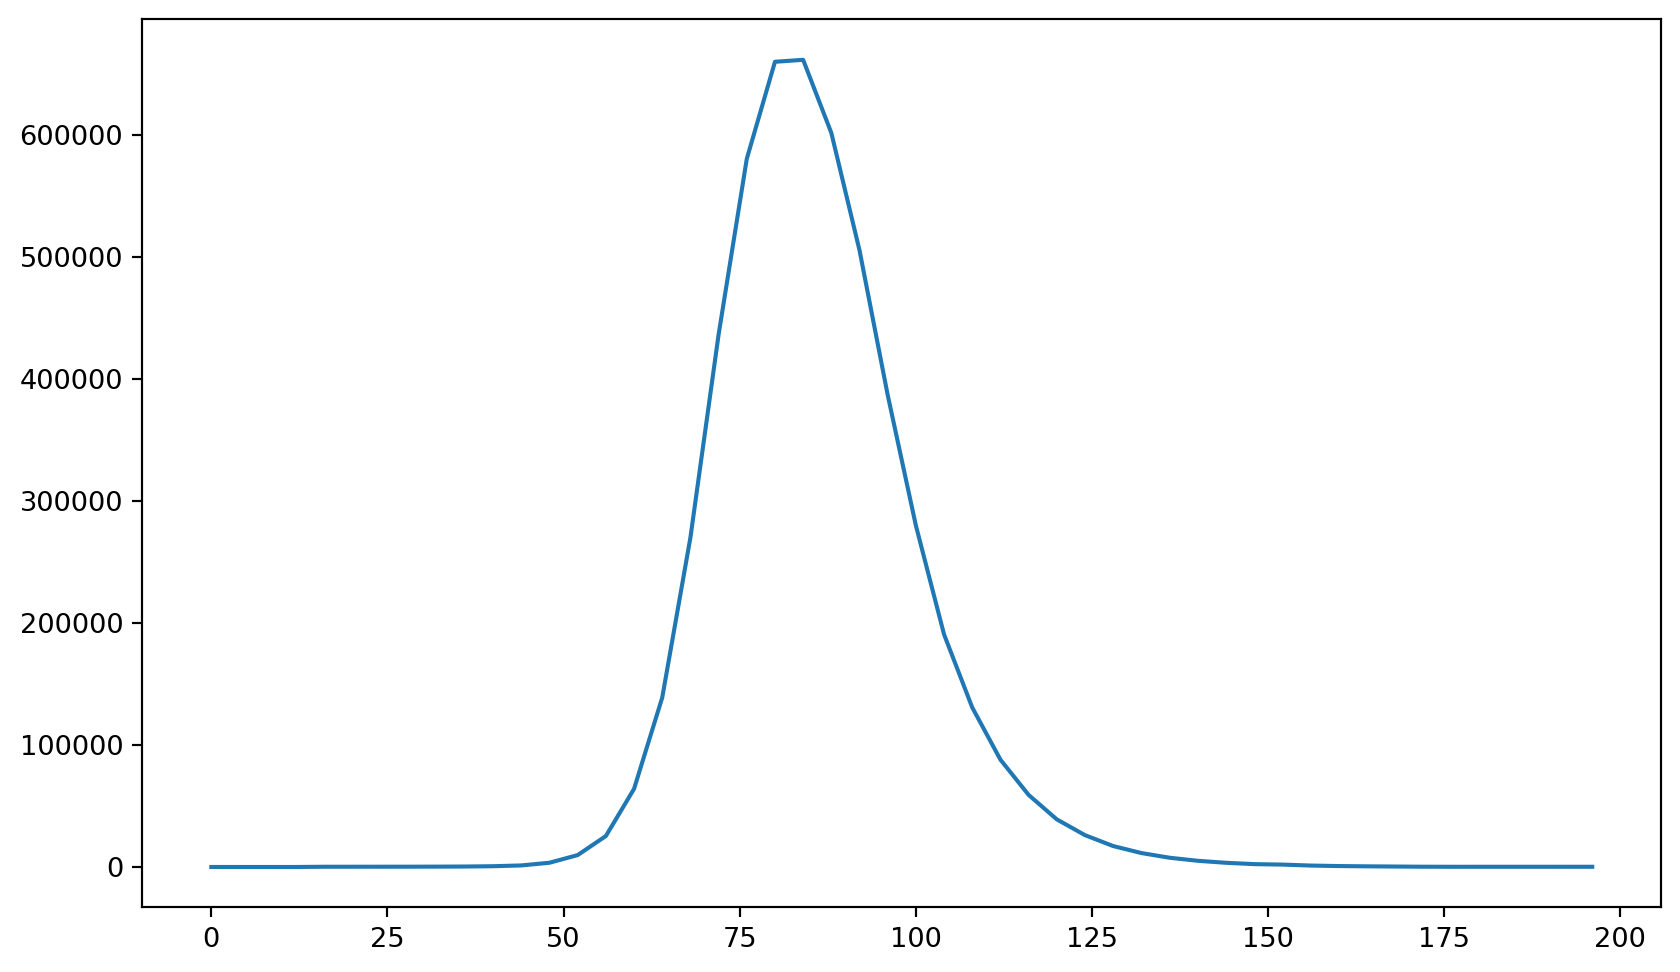

In [28]:
plt.plot(res10.loc[('zwe', 2040)])

In [29]:
def makeit(ser):
    res = ser.copy()
    c, y, b = ser.index[0]
    if res.min() < 0:    # FIXME:
        # print(c, y, end=' ')
        # print('has negatives')
        res = res - res.min()
        res = res / res.sum()
    res = res.astype(int).astype(str)
    res_combined = ', '.join(res.values)
    # print(ser)
    # c, y, b = ser.index[0]
    return np.array(res_combined)

In [30]:
gs = res10.groupby(['country', 'year'])
df = gs.get_group(('ago', 1981))

In [31]:
makeit(df)

array('61, 122, 216, 347, 563, 870, 1356, 2047, 3101, 4593, 6838, 9964, 14643, 21457, 31232, 45556, 64029, 87444, 115655, 152815, 198476, 235911, 254022, 240537, 204631, 156598, 109334, 71787, 45035, 28752, 18142, 11937, 7877, 5163, 3362, 2099, 1314, 797, 490, 292, 181, 109, 69, 44, 28, 19, 12, 7, 4, 2',
      dtype='<U296')

In [32]:
res11 = res10.groupby(['country', 'year']).apply(makeit)

In [33]:
res11

country  year
ago      1800    3, 128, 137, 149, 164, 185, 216, 265, 348, 506...
         1801    3, 128, 137, 149, 164, 185, 216, 265, 348, 506...
         1802    3, 128, 137, 149, 164, 185, 216, 265, 348, 506...
         1803    3, 128, 137, 149, 164, 185, 216, 265, 348, 506...
         1804    3, 128, 137, 149, 164, 185, 216, 265, 348, 506...
                                       ...                        
zwe      2036    0, 0, 1, 7, 149, 160, 176, 198, 238, 341, 624,...
         2037    0, 0, 1, 8, 159, 172, 189, 213, 254, 362, 652,...
         2038    0, 0, 2, 8, 171, 184, 202, 227, 271, 383, 681,...
         2039    0, 0, 1, 6, 179, 193, 210, 234, 276, 364, 599,...
         2040    0, 0, 1, 6, 191, 205, 224, 249, 293, 384, 626,...
Name: income_mountain, Length: 40006, dtype: object

In [34]:
res11.name = 'income_mountain_50bracket_shape_for_log'

In [35]:
res11.to_csv('../../ddf--datapoints--income_mountain_50bracket_shape_for_log--by--country--year.csv')

In [152]:
shapeslib.get_weights(1871)

(0.0, 1.0)

In [122]:
s = shapeslib.get_shape(('sle', 1983), shapes)

In [123]:
s.sum()

1.000002

In [124]:
s.mean()

0.00500001

In [125]:
s2 = (s - s.min())
s2 = s2 / s2.sum()

In [126]:
s2.sum()

1.0

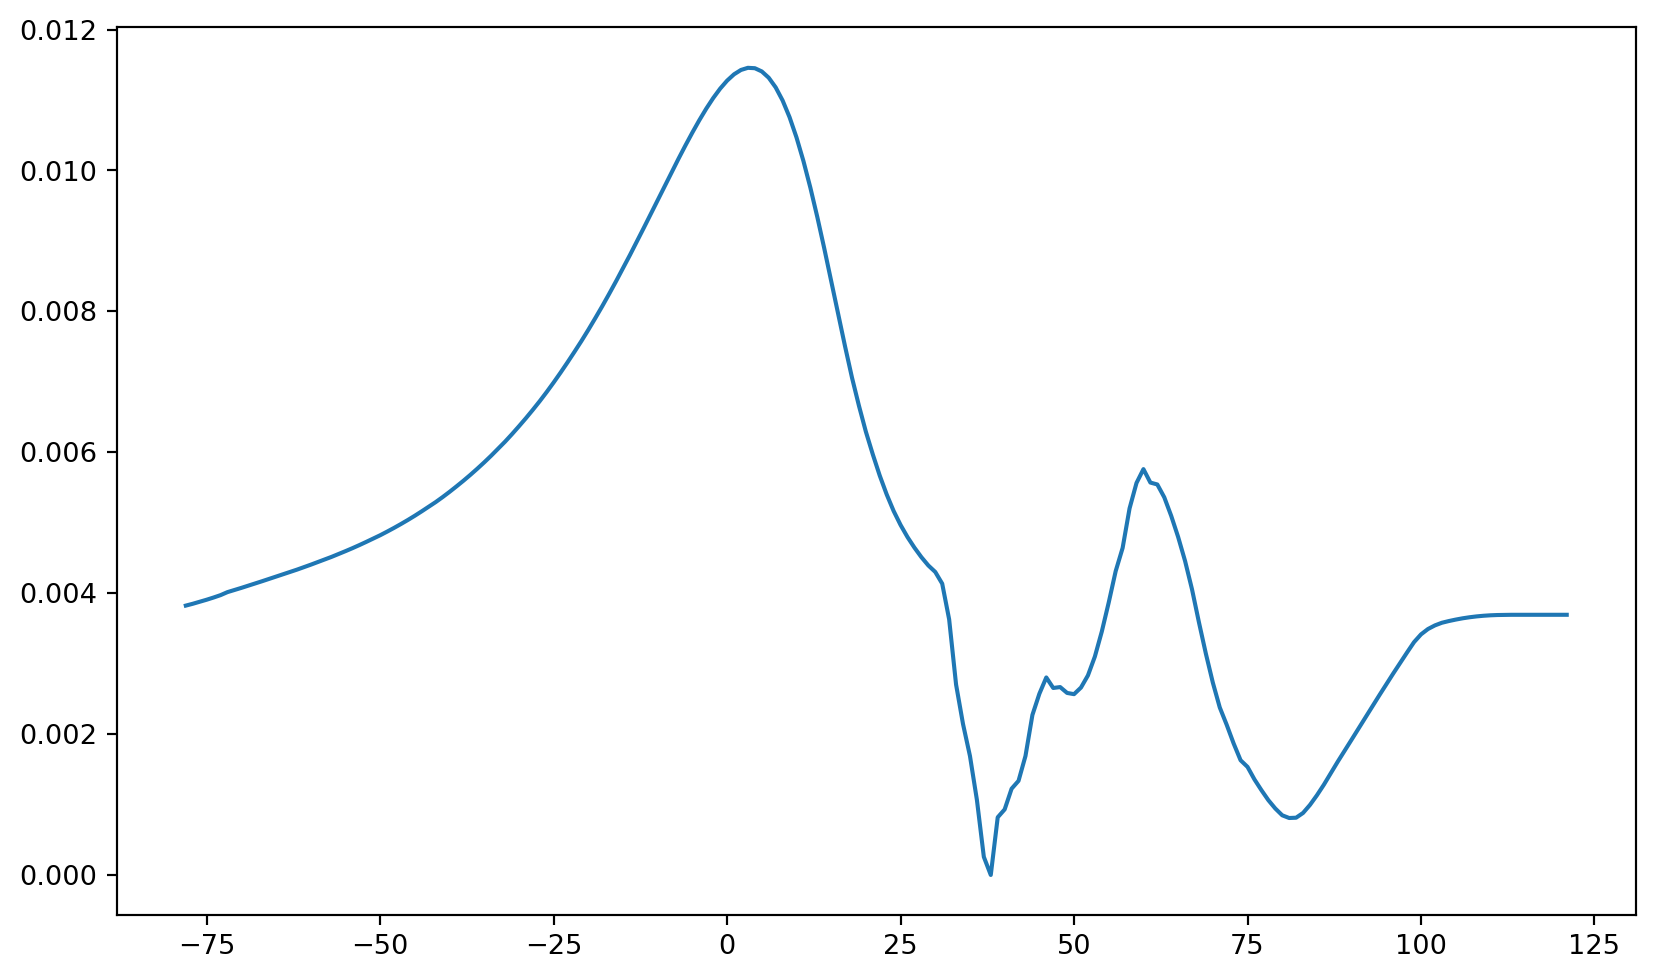

In [127]:
plt.plot(s2)
# plt.plot(s)

In [76]:
c

'ago'

In [173]:
def shape_to_mountain(shape_, idx, income_gini):
    c, y = idx
    try:
        i, _ = shapeslib.get_income_gini(idx, income_gini)
    except KeyError:
        print(idx)
        return None
    bracket = bracket_number_from_income(i)
    shape = shape_.copy()
    shape.index = shape.index + bracket
    res = shape.loc[0:199]
    if len(res) != 200:
        new_idx = pd.Index(range(200))
        res = res.reindex(new_idx, fill_value=0)
        
    new_idx2 = pd.MultiIndex.from_product([[c], [y], range(200)], names=['country', 'year', 'bracket'])
    res.index = new_idx2
    return res

In [129]:
c = res4[0][0]
df = res4[0][1].copy()
df = df.set_index(['bracket'], append=True)
ser = df.loc[(c, 1981)]

In [130]:
ser

,population_percentage
bracket,
-94,0.000007
-93,0.000009
-92,0.000010
-91,0.000012
-90,0.000014
...,...
101,0.000000
102,0.000000
103,0.000000


In [131]:
shape_to_mountain(ser, (c, 1981), income_gini)

population_percentage
country year bracket                       
ago     1981 0                     0.000007
             1                     0.000009
             2                     0.000010
             3                     0.000012
             4                     0.000014
...                                     ...
             195                   0.000000
             196                   0.000000
             197                   0.000000
             198                   0.000000
             199                   0.000000

[200 rows x 1 columns]

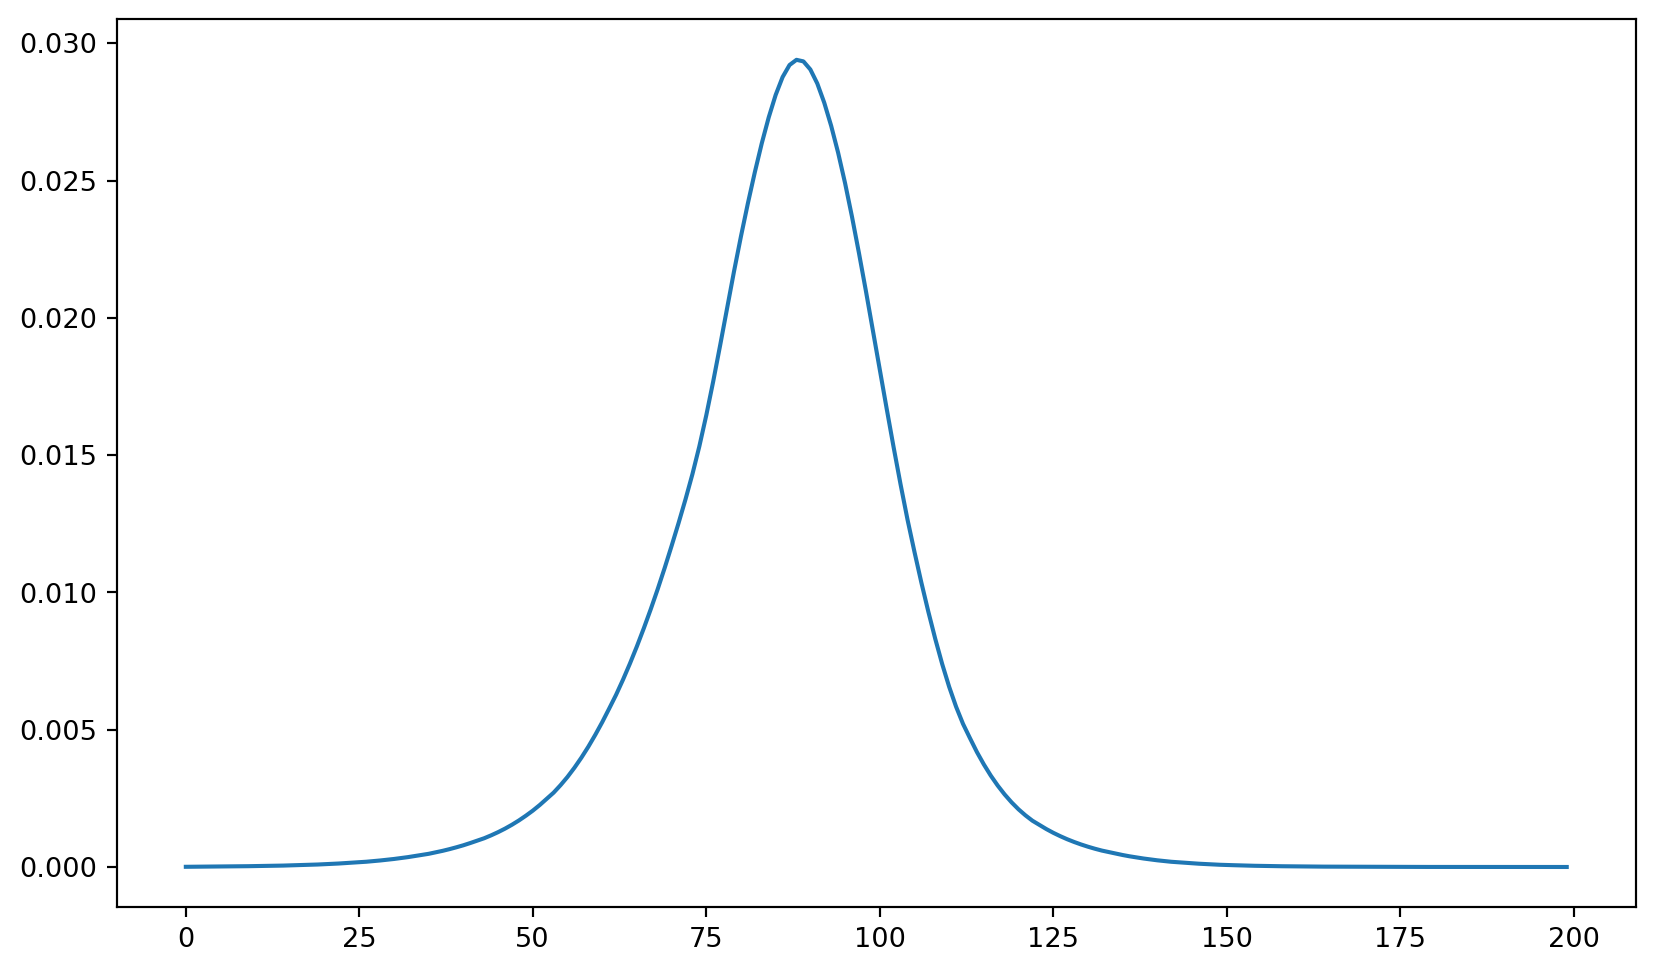

In [132]:
plt.plot(shape_to_mountain(ser, (c, 1981), income_gini).values)

In [103]:
new_idx = pd.MultiIndex.from_product([[c], [y], range(200)], names=['country', 'year', 'bracket'])

In [104]:
new_idx

MultiIndex([('ago', 1993,   0),
            ('ago', 1993,   1),
            ('ago', 1993,   2),
            ('ago', 1993,   3),
            ('ago', 1993,   4),
            ('ago', 1993,   5),
            ('ago', 1993,   6),
            ('ago', 1993,   7),
            ('ago', 1993,   8),
            ('ago', 1993,   9),
            ...
            ('ago', 1993, 190),
            ('ago', 1993, 191),
            ('ago', 1993, 192),
            ('ago', 1993, 193),
            ('ago', 1993, 194),
            ('ago', 1993, 195),
            ('ago', 1993, 196),
            ('ago', 1993, 197),
            ('ago', 1993, 198),
            ('ago', 1993, 199)],
           names=['country', 'year', 'bracket'], length=200)

In [55]:
i = ('ago', 1946)
shapeslib.get_estimated_mountain(i, shapes, income_gini, resample=False) 

bracket
0      5.250000e-06
1      6.750000e-06
2      7.500000e-06
3      9.000000e-06
4      1.074500e-05
           ...     
195    2.600000e-07
196    2.300000e-07
197    2.050000e-07
198    1.750000e-07
199    1.700000e-07
Length: 200, dtype: float64